In [2]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from scipy import stats

In [3]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [4]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [5]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [6]:
# response['data']

# Fetching the data from API

In [7]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [8]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [9]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14012,YT,2022-11-06,5578,5
14013,YT,2022-11-07,5581,3
14014,YT,2022-11-08,5582,1
14015,YT,2022-11-09,5582,0


In [10]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [11]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13914,YT,2022-11-01,32,0
13915,YT,2022-11-02,32,0
13916,YT,2022-11-03,32,0
13917,YT,2022-11-04,32,0


In [12]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [13]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13785,YT,2022-11-13,0,0
13786,YT,2022-11-14,0,0
13787,YT,2022-11-15,0,0
13788,YT,2022-11-16,0,0


In [14]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13054,YT,2022-11-01,5556,3,32,0,0,0
13055,YT,2022-11-02,5560,4,32,0,0,0
13056,YT,2022-11-03,5564,4,32,0,0,0
13057,YT,2022-11-04,5566,2,32,0,0,0


In [15]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13054,YT,2022-11-01,5556,3,32,0,0,0
13055,YT,2022-11-02,5560,4,32,0,0,0
13056,YT,2022-11-03,5564,4,32,0,0,0
13057,YT,2022-11-04,5566,2,32,0,0,0


In [16]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
7000,NT,2022-01-20,4508,136,13,0,0,0,0.288,0.000
7173,NU,2020-03-01,0,0,0,0,0,0,NaN,NaN
4858,NL,2021-08-31,1478,0,7,0,0,0,0.474,NaN
4220,NB,2022-08-17,73643,0,456,0,27,0,0.619,NaN
436,AB,2021-05-18,221208,955,2158,6,691,13,0.976,0.628
9291,PE,2020-10-21,64,0,0,0,0,0,0.000,NaN
949,AB,2022-10-13,610416,258,4951,0,1014,0,0.811,0.000
3591,NB,2020-11-26,465,12,7,0,1,0,1.505,0.000
9223,PE,2020-08-14,41,0,0,0,0,0,0.000,NaN
1715,BC,2021-10-29,205300,579,2156,9,436,2,1.050,1.554


In [17]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [18]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [19]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [20]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [21]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6280,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9027,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7143,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6281,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9028,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [22]:
# Calculating active cases
covid_dataframe_df['Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases'] + covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
3946,NB,2021-11-16,7268,34,122,0,22,1,1.679,0.000,7124
10561,QC,2021-09-05,387205,623,11308,0,149,2,2.920,0.000,375748
7640,NU,2021-06-11,654,4,4,0,0,0,0.612,0.000,650
611,AB,2021-11-09,328359,500,3164,5,608,0,0.964,1.000,324587
5941,NS,2021-12-14,9018,127,110,0,4,0,1.220,0.000,8904
622,AB,2021-11-20,332677,379,3211,0,496,0,0.965,0.000,328970
10031,PE,2022-10-31,53561,0,69,0,10,0,0.129,0.000,53482
6878,NT,2021-09-20,749,0,1,0,0,0,0.134,0.000,748
21,AB,2020-03-29,699,34,3,1,41,3,0.429,2.941,655
6361,NT,2020-04-21,5,0,0,0,0,0,0.000,0.000,5


In [23]:
# Top 5 active cases 
Highest_active_province = covid_dataframe_df.groupby('Province').max()[['Active Cases', 'Date']].sort_values(['Active Cases'], ascending = False).reset_index()
Highest_active_province_df = Highest_active_province.set_index('Province')['Active Cases']
top_5_active_province = Highest_active_province_df.iloc[0:5]
top_5_active_province

Province
ON    1588656
QC    1303256
AB     624315
BC     392070
MB     152384
Name: Active Cases, dtype: int64

# Data Visualization 

In [24]:
# Descriptive Statistics 
covid_dataframe_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Active Cases
count,1.051200e+04,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,1.051200e+04
mean,1.335294e+05,296.473744,1722.268360,2.953291,207.147070,4.391933,1.216008,1.167899,1.316000e+05
std,2.845225e+05,1033.313851,3626.155792,10.148325,424.756455,18.324772,1.516433,7.089001,2.808009e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.157500e+02,0.000000,3.000000,0.000000,0.000000,0.000000,0.323750,0.000000,3.150000e+02
50%,5.899000e+03,5.000000,63.000000,0.000000,9.000000,0.000000,0.939000,0.000000,5.805500e+03
75%,1.268030e+05,178.000000,1577.000000,0.000000,237.000000,0.000000,1.413000,0.000000,1.245008e+05
max,1.605818e+06,19509.000000,18218.000000,153.000000,4190.000000,758.000000,11.679000,200.000000,1.588656e+06


In [25]:
covid_dataframe_df.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate', 'Active Cases'],
      dtype='object')

In [26]:
sorted_by_province = covid_dataframe_df.groupby('Province').agg({'Cumulative confirmed cases': 'mean', 'Cumulative death cases':'mean','Cumulative hospitalizations cases':'mean', 'Mortality rate':'mean', "Active Cases":'mean'})

sorted_by_province = sorted_by_province.rename(columns={"Cumulative confirmed cases": "Average confirmed cases", "Cumulative death cases": "Average death cases", "Cumulative hospitalizations cases":"Average hospitalization", "Mortality rate":"Average mortality rate", "Active Cases":"Average Active Cases"})
sorted_dataset=pd.DataFrame(sorted_by_province)
sorted_dataset

,Average confirmed cases,Average death cases,Average hospitalization,Average mortality rate,Average Active Cases
Province,,,,,
AB,347140.717445,2945.179361,607.452088,1.021742,343588.085995
BC,215359.761404,2402.575439,274.308772,1.715335,212682.877193
MB,83820.979215,1298.712471,219.792148,1.706073,82302.474596
NB,23581.348810,169.292857,23.255952,1.078249,23388.800000
NL,14645.132733,60.615298,4.762655,0.704659,14579.754781
NS,20769.339416,185.330900,20.075426,2.624300,20563.933090
NT,1937.467517,4.773782,0.205336,0.113352,1932.488399
NU,541.728643,2.153266,0.000000,0.309275,539.575377
ON,707213.674460,8982.510791,905.093525,2.582246,697326.070144


## Mortality rate by province 

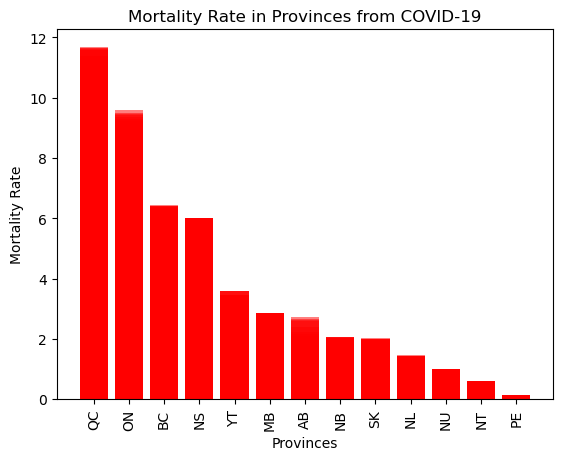

In [27]:

covid_dataframe_df = covid_dataframe_df.sort_values("Mortality rate",ascending = False)

x_value = covid_dataframe_df["Province"]
y_value=covid_dataframe_df["Mortality rate"]

plt.bar(x_value, y_value, color='red', alpha=0.5, align='center')
plt.xlabel("Provinces")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate in Provinces from COVID-19")
plt.xticks(rotation="vertical")
plt.show()


## COVID-19 Average Cases by Province 

Text(0.5, 1.0, 'Top 5 Average COVID-19 Cases in Provinces')

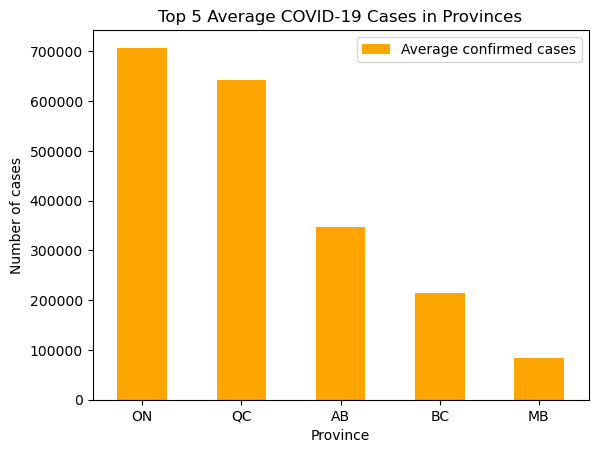

In [47]:
sorted_dataset = sorted_dataset.sort_values(by=['Average confirmed cases'], ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average confirmed cases')

data = pd.DataFrame({"Average confirmed cases": top_five["Average confirmed cases"]}, index=top_five.index)

ax = data.plot(kind="bar", rot=0, color = 'orange')

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Top 5 Average COVID-19 Cases in Provinces")


Text(0.5, 1.0, 'Average COVID-19 Hospitalization in Top 5 Provinces')

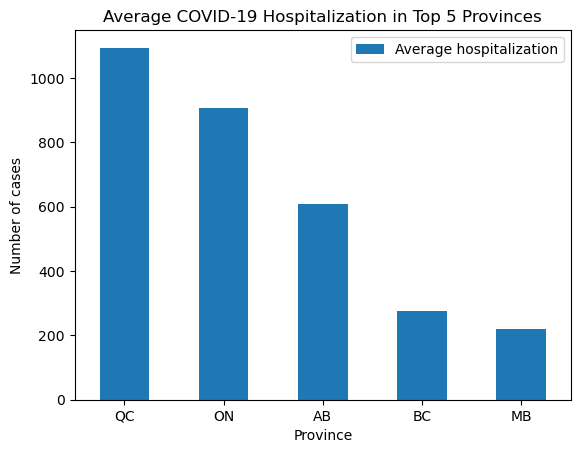

In [48]:
sorted_dataset = sorted_dataset.sort_values(by=['Average hospitalization'], ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average hospitalization')
data = pd.DataFrame({"Average hospitalization": top_five["Average hospitalization"]}, index=top_five.index)

ax = data.plot(kind="bar", rot=0)

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Average COVID-19 Hospitalization in Top 5 Provinces")

Text(0.5, 1.0, 'Average COVID-19 Death Cases in top 5 Provinces')

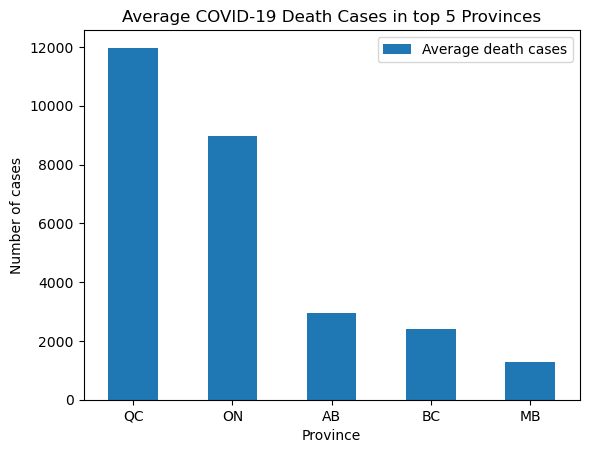

In [49]:
sorted_dataset = sorted_dataset.sort_values('Average death cases', ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average death cases')
data = pd.DataFrame({"Average death cases": top_five["Average death cases"]}, index=top_five.index)

ax = data.plot(kind="bar", rot=0)

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Average COVID-19 Death Cases in top 5 Provinces")

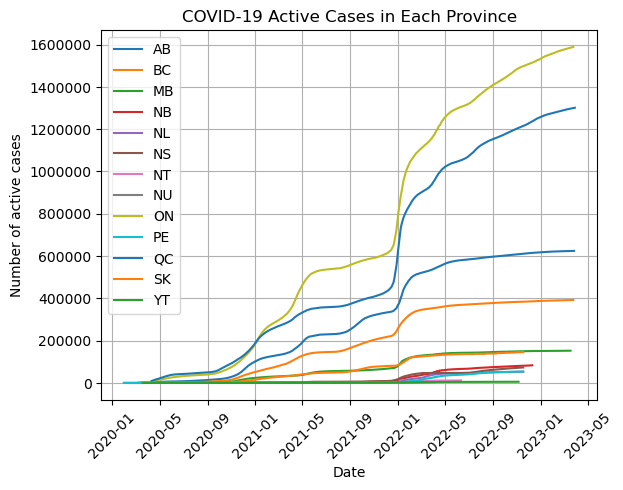

In [ ]:
active_cases_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Active Cases']]

active_cases_df = active_cases_df.sort_values(['Province', 'Date'])
total_cases = active_cases_df.groupby('Province')['Active Cases'].sum()

for province, group in active_cases_df.groupby('Province'):
    plt.plot(group['Date'], group['Active Cases'], label=province)

# Set the x-label, y-label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Number of active cases')
plt.title('COVID-19 Active Cases in Each Province')
plt.grid()

plt.xticks(rotation=45)
plt.yscale('linear')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))

plt.legend()

# Display the plot
plt.show()

In [ ]:
covid_dataframe_df.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate', 'Active Cases'],
      dtype='object')

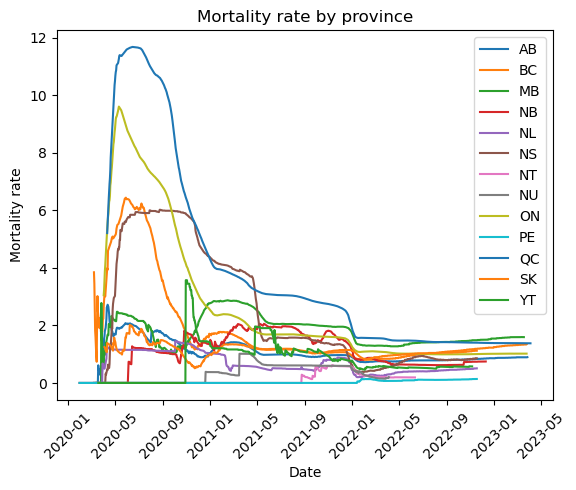

In [50]:
Mortality_rate_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Mortality rate']]
# sort by province and date
Mortality_rate_plot_df = Mortality_rate_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Mortality_rate_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Mortality rate'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mortality rate')
plt.title('Mortality rate by province')
plt.legend()
# show the plot
plt.show()